In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

from scipy.optimize import differential_evolution
from evolutionary_programming import evolutionary_programming

# Problem

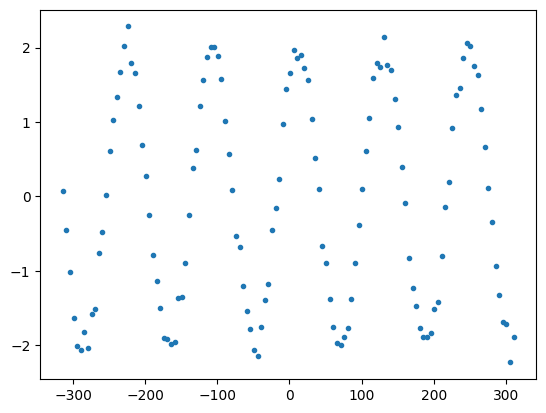

In [2]:
df = pandas.read_csv('../csv/datos.csv')
X = df['x'].values
Y = df['y'].values
plt.figure()
plt.plot(X,Y,'.')
plt.show()

10.680184386736977


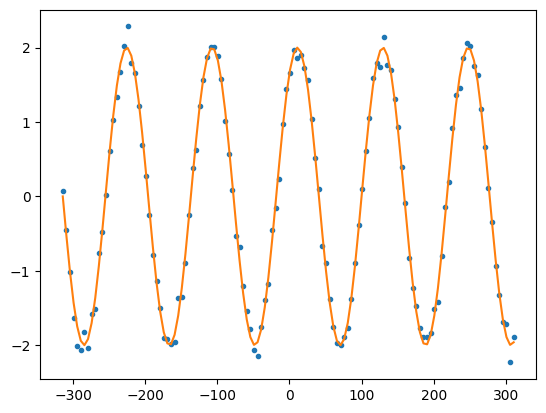

In [19]:
P = [2,10,10]
bounds = [[-50,50],[-50,50],[-50,50]]

def objective_function(P,X,Y):
    A,B,C = P[0],P[1],P[2]
    Y2 = A*np.sin(B*X+C*np.pi)
    return np.sum(np.abs(Y-Y2))

def draw_function(P,X,Y):
    A,B,C = P[0],P[1],P[2]
    Y2 = A*np.sin(B*X+C*np.pi)
    plt.figure()
    plt.plot(X,Y,'.')
    plt.plot(X,Y2)
    plt.show()

print(objective_function(P,X,Y))
draw_function(P,X,Y)

# Differential Evolution scipy.optimize

In [21]:
res = differential_evolution(objective_function,bounds,args=(X,Y))
res

     fun: 10.659051980336667
     jac: array([-2.60129537, 71.57316867,  2.86496065])
 message: 'Optimization terminated successfully.'
    nfev: 15223
     nit: 334
 success: True
       x: array([ -1.99679867, -40.26551076,  48.45215486])

10.664114569358713


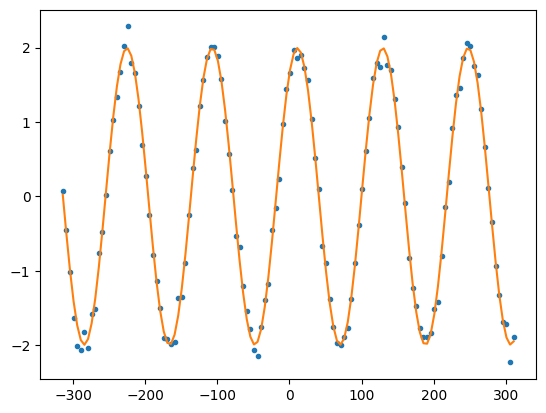

In [5]:
P = res.x
print(objective_function(P,X,Y))
draw_function(P,X,Y)

# Evolutionary programming implementation

Iteration: 0 Best fitness: 166.01082049020246
Best solution: [0. 0. 0.]
Iteration: 1 Best fitness: 160.41908014522417
Best solution: [-1.55443320e-02 -2.08505942e+01 -2.05657843e+01]
Iteration: 2 Best fitness: 160.3603881206893
Best solution: [-2.95338584e-02  3.89612490e+01  2.42943403e+01]
Iteration: 3 Best fitness: 160.3603881206893
Best solution: [-2.95338584e-02  3.89612490e+01  2.42943403e+01]
Iteration: 4 Best fitness: 160.3603881206893
Best solution: [-2.95338584e-02  3.89612490e+01  2.42943403e+01]
Iteration: 5 Best fitness: 160.33229440811388
Best solution: [-0.15383961 12.87714914 48.75428757]
Iteration: 6 Best fitness: 160.2289570288205
Best solution: [ 0.1845055  -4.22631365 -0.49494622]
Iteration: 7 Best fitness: 160.2289570288205
Best solution: [ 0.1845055  -4.22631365 -0.49494622]
Iteration: 8 Best fitness: 83.6679949112858
Best solution: [ -2.41987771 -20.15950782   1.20989794]
Iteration: 9 Best fitness: 83.6679949112858
Best solution: [ -2.41987771 -20.15950782   1.20

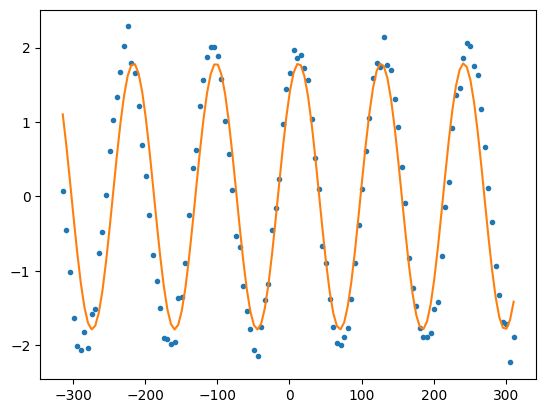

array([  1.78884432,  40.26728118, -54.48329314])

In [24]:
P, nit, fun, nfev = evolutionary_programming(objective_function,bounds,args=(X,Y),popsize=100,iterations=500,sigma=0.2)
objective_function(P,X,Y)
print(nit, fun, nfev)
draw_function(P,X,Y)
P